In [2]:
using ValidatedNumerics

In [3]:
a = 1..2

[1, 2]

This is the set of real numbers $\{1 \le x \le 2 \}$

In [4]:
f(x) = x^2 - 2x

f (generic function with 1 method)

In [5]:
f(a)

[-3, 2]

In [6]:
f(3..4)

[1, 10]

In [7]:
f(3)

3

In [8]:
using PyPlot

/Users/dpsanders/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [14]:
using PyCall
@pyimport matplotlib.patches as patches

function rectangle(xlo, ylo, xhi, yhi; color="grey", alpha=0.5, linewidth=0)
    gca()[:add_patch](patches.Rectangle(
        (xlo, ylo), xhi - xlo, yhi - ylo,
        facecolor=color, alpha=alpha, linewidth=0, edgecolor="none"
    ))
end

function rectangle(X::IntervalBox, color="grey", alpha=0.5, linewidth=0)
    rectangle(X[1].lo, X[2].lo, X[1].hi, X[2].hi, color=color, alpha=alpha, linewidth=linewidth)
end

rectangle (generic function with 5 methods)

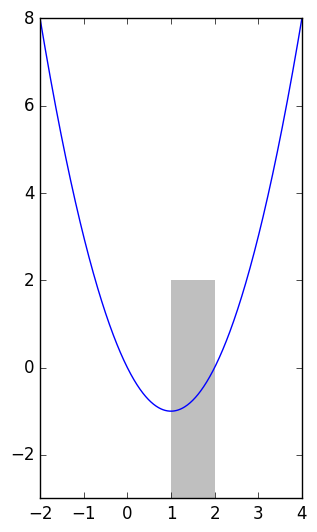

(-2.0,4.0,-3.0,8.0)

In [19]:
xx = -2:0.01:4
plot(xx, f.(xx))

rectangle(IntervalBox(x, y))

axis("image")

In [18]:
x = 1..2
y = f(x)

[-3, 2]

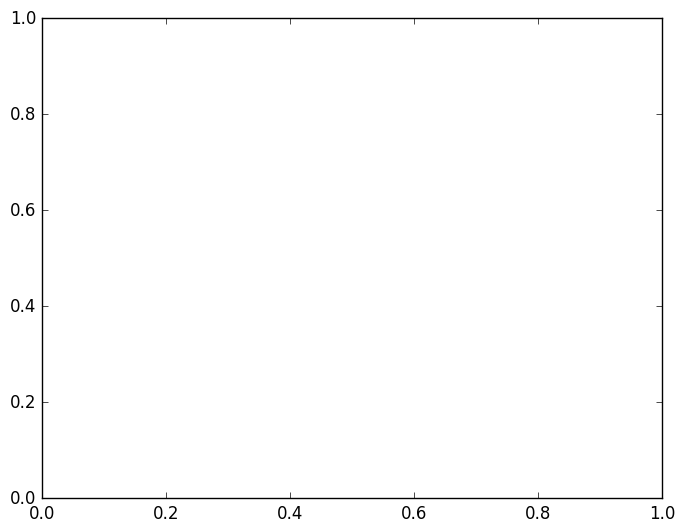

PyObject <matplotlib.patches.Rectangle object at 0x32bebb750>

  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/dpsanders/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/dpsanders/.julia/v0.5/IJulia/src/kernel.jl:31
i

In [16]:
rectangle(IntervalBox(x, y))

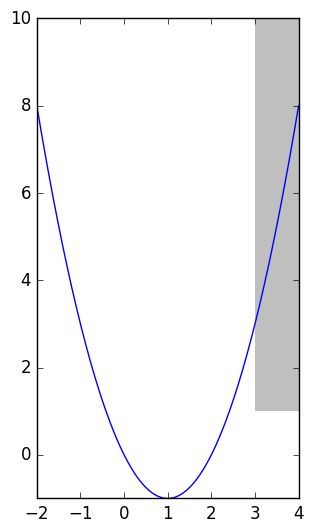

(-2.0,4.0,-1.0,10.0)

In [20]:
xx = -2:0.01:4
plot(xx, f.(xx))

x = 3..4
rectangle(IntervalBox(x, f(x)))

axis("image")

## Contractors:

Take an IntervalBox and contract it:

In [22]:
IntervalBox(1..2, 3..4)

[1, 2] × [3, 4]

E.g. $y = x^2$:

In [23]:
function square_pos(X::IntervalBox)  # the bit where x is positive
    x, y = X
    
    x = x ∩ (0..∞)  
    y = y ∩ (x^2)

    x = x ∩ √y
    
    return IntervalBox(x, y)
    
end

square_pos (generic function with 1 method)

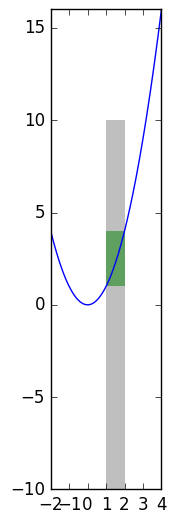

(-2.0,4.0,-10.0,16.0)

In [24]:
xx = -2:0.01:4
plot(xx, xx.^2)

x = 1..2
y = -10..10

rectangle(IntervalBox(x, y))

(x, y) = square_pos(IntervalBox(x, y))

rectangle(IntervalBox(x, y), "green" )


axis("image")

In [25]:
x = 1..2
y = -10^8..10^8

square_pos(IntervalBox(x,y))


[1, 2] × [1, 4]

In [28]:
function add_one(X::IntervalBox)  # the set y = x+1
    x, y = X
    
    y = y ∩ (x + 1)
    x = x ∩ (y - 1)
    
    return IntervalBox(x, y)
end

add_one (generic function with 1 method)

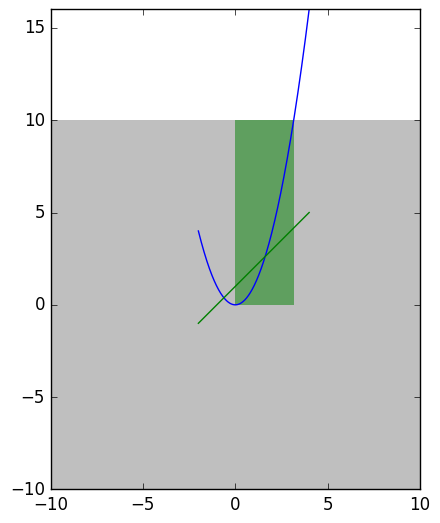

(-10.0,10.0,-10.0,16.0)

In [31]:
xx = -2:0.01:4
plot(xx, xx.^2)
plot(xx, xx+1)


x = -10..10
y = -10..10

rectangle(IntervalBox(x, y))

(x, y) = add_one(IntervalBox(x, y))
(x, y) = square_pos(IntervalBox(x, y))


rectangle(IntervalBox(x, y), "green" )


axis("image")

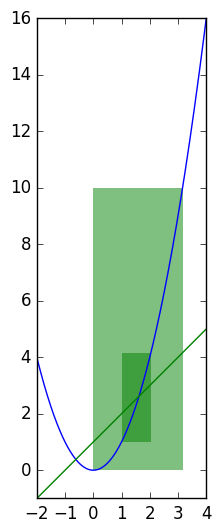

(-2.0,4.0,-1.0,16.0)

In [32]:
xx = -2:0.01:4
plot(xx, xx.^2)
plot(xx, xx+1)


x = -10..10
y = -10..10

#rectangle(IntervalBox(x, y))

(x, y) = add_one(IntervalBox(x, y))
(x, y) = square_pos(IntervalBox(x, y))

rectangle(IntervalBox(x, y), "green" )


(x, y) = add_one(IntervalBox(x, y))
(x, y) = square_pos(IntervalBox(x, y))

rectangle(IntervalBox(x, y), "green" )


axis("image")